In [43]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [44]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN','NAME'], axis=1)

In [45]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [46]:
# Determine which values to replace if counts are less than ...?
application_counts = application_df.APPLICATION_TYPE.value_counts()
replace_list_apps = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_list_apps:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [47]:
# Look at CLASSIFICATION value counts
classification_counts = application_df.CLASSIFICATION.value_counts()

In [48]:
# Determine which values to replace if counts are less than ..?
replace_list_class = list(classification_counts[classification_counts < 1500].index)

# Replace in dataframe
for cls in replace_list_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [49]:
# Generate our categorical variable lists
application_cat_var = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat_var].nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [50]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat_var]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat_var)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [51]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat_var,1)

In [52]:
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [53]:
application_df["STATUS"].nunique()

2

In [54]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL
X = application_df.drop(columns=["IS_SUCCESSFUL"])

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [55]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [56]:
X_train_scaled[0]

array([ 0.01079982, -0.01334191, -0.08984839, -0.12551965, -0.18065488,
        0.51895864, -0.21563703, -0.18919898, -0.19029844, -0.14573754,
       -0.15107303, -0.92331648, -0.04278355,  0.92918396, -0.02789425,
       -0.01247081, -0.01972038,  0.98802074, -0.40650625, -0.46324871,
       -0.24180601, -0.24351243, -0.26205314, -0.10752278, -0.06523281,
       -0.00881785,  0.46948844, -0.4443106 , -0.6539751 , -0.11980531,
       -0.03691139,  0.67824388, -1.55850963, -0.14794773, -0.12867786,
       -0.33142954, -0.08534204,  5.96152436, -0.35291139, -0.06462905,
       -0.07397412,  0.02925687, -0.02925687])

In [57]:
len(X_train_scaled[0])

43

In [61]:
## Attempt 1: Increasing neurons

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_layer1 =  60
hidden_layer2 = 30

nn_optimization1 = tf.keras.models.Sequential()

# First hidden layer
nn_optimization1.add(
    tf.keras.layers.Dense(units=hidden_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn_optimization1.add(tf.keras.layers.Dense(units=hidden_layer2, activation="relu"))

# Output layer
nn_optimization1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_optimization1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 60)                2640      
_________________________________________________________________
dense_20 (Dense)             (None, 30)                1830      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 31        
Total params: 4,501
Trainable params: 4,501
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Compile the model
nn_optimization1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [63]:
# Train the model
fit_model = nn_optimization1.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5725 - accuracy: 0.7199
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5558 - accuracy: 0.7282
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5521 - accuracy: 0.7305
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5511 - accuracy: 0.7296
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5494 - accuracy: 0.7310
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5488 - accuracy: 0.7318
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5480 - accuracy: 0.7335
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5469 - accuracy: 0.7338
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5460 - accuracy: 0.7346
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5459 - accura

804/804 [==============================] - 1s 1ms/step - loss: 0.5359 - accuracy: 0.7394
Epoch 82/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5361 - accuracy: 0.7385
Epoch 83/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5355 - accuracy: 0.7392
Epoch 84/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5357 - accuracy: 0.7395
Epoch 85/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5357 - accuracy: 0.7400
Epoch 86/100
804/804 [==============================] - ETA: 0s - loss: 0.5353 - accuracy: 0.73 - 1s 1ms/step - loss: 0.5359 - accuracy: 0.7399
Epoch 87/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5359 - accuracy: 0.7390
Epoch 88/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5353 - accuracy: 0.7389
Epoch 89/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5356 - accuracy: 0.7384
Epoch 90/100
804/804 [==============================]

In [64]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_optimization1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5603 - accuracy: 0.7305
Loss: 0.5603455305099487, Accuracy: 0.7304956316947937


<AxesSubplot:>

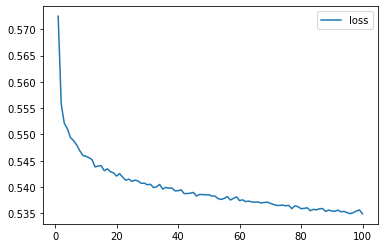

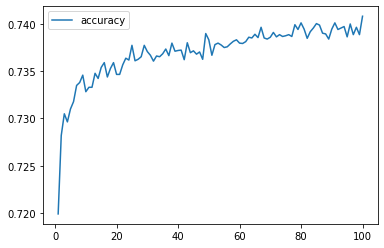

In [65]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")
# Plot the accuracy
history_df.plot(y="accuracy")

In [66]:
## Attempt 2: Adding hidden layers

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_layer1 =  20
hidden_layer2 = 15
hidden_layer3 = 10
hidden_layer4 = 5

nn_optimization2 = tf.keras.models.Sequential()

# First hidden layer
nn_optimization2.add(
    tf.keras.layers.Dense(units=hidden_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn_optimization2.add(tf.keras.layers.Dense(units=hidden_layer2, activation="relu"))

# Third hidden layer
nn_optimization2.add(tf.keras.layers.Dense(units=hidden_layer3, activation="relu"))

# Fourth hidden layer
nn_optimization2.add(tf.keras.layers.Dense(units=hidden_layer4, activation="relu"))

# Output layer
nn_optimization2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_optimization2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 20)                880       
_________________________________________________________________
dense_23 (Dense)             (None, 15)                315       
_________________________________________________________________
dense_24 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 6         
Total params: 1,416
Trainable params: 1,416
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Compile the model
nn_optimization2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Train the model
fit_model = nn_optimization2.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5905 - accuracy: 0.7069
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5569 - accuracy: 0.7280
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5535 - accuracy: 0.7306
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5514 - accuracy: 0.7311
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5499 - accuracy: 0.7313
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5486 - accuracy: 0.7320
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5482 - accuracy: 0.7308
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5474 - accuracy: 0.7320
Epoch 9/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5468 - accuracy: 0.7324
Epoch 10/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5462 - accura

804/804 [==============================] - 1s 1ms/step - loss: 0.5381 - accuracy: 0.7372
Epoch 82/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5375 - accuracy: 0.7390
Epoch 83/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5377 - accuracy: 0.7371
Epoch 84/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5377 - accuracy: 0.7378
Epoch 85/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5378 - accuracy: 0.7361
Epoch 86/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5373 - accuracy: 0.7380
Epoch 87/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5374 - accuracy: 0.7377
Epoch 88/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5375 - accuracy: 0.7382
Epoch 89/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5374 - accuracy: 0.7381
Epoch 90/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5374 - accuracy: 

In [68]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_optimization2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5587 - accuracy: 0.7294
Loss: 0.5587334036827087, Accuracy: 0.7294460535049438


<AxesSubplot:>

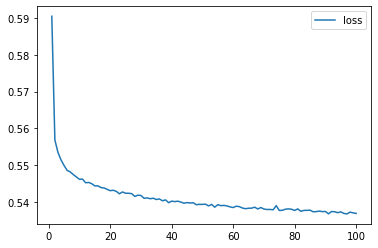

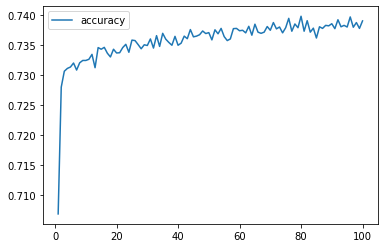

In [69]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")
# Plot the accuracy
history_df.plot(y="accuracy")

In [70]:
## Attempt 3: Changing activation functions

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_layer1 =  20
hidden_layer2 = 10

nn_optimization3 = tf.keras.models.Sequential()

# First hidden layer
nn_optimization3.add(
    tf.keras.layers.Dense(units=hidden_layer1, input_dim=number_input_features, activation="tanh")
)
# Second hidden layer
nn_optimization3.add(tf.keras.layers.Dense(units=hidden_layer2, activation="tanh"))

# Output layer
nn_optimization3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_optimization3.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 20)                880       
_________________________________________________________________
dense_28 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 11        
Total params: 1,101
Trainable params: 1,101
Non-trainable params: 0
_________________________________________________________________


In [71]:
# Compile the model
nn_optimization3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Train the model
fit_model = nn_optimization3.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5846 - accuracy: 0.7088
Epoch 2/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5596 - accuracy: 0.7276
Epoch 3/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5551 - accuracy: 0.7295
Epoch 4/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5527 - accuracy: 0.7313
Epoch 5/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5512 - accuracy: 0.7309
Epoch 6/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5498 - accuracy: 0.7308
Epoch 7/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5497 - accuracy: 0.7317
Epoch 8/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5483 - accuracy: 0.7332
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5478 - accuracy: 0.7326
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5474 - accura

804/804 [==============================] - 1s 1ms/step - loss: 0.5372 - accuracy: 0.7375
Epoch 82/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5377 - accuracy: 0.7380
Epoch 83/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5374 - accuracy: 0.7379
Epoch 84/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5373 - accuracy: 0.7372
Epoch 85/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5371 - accuracy: 0.7386
Epoch 86/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5373 - accuracy: 0.7385
Epoch 87/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5370 - accuracy: 0.7389
Epoch 88/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5370 - accuracy: 0.7381
Epoch 89/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5371 - accuracy: 0.7382
Epoch 90/100
804/804 [==============================] - 1s 1ms/step - loss: 0.5371 - accuracy: 

In [72]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_optimization3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5554 - accuracy: 0.7289
Loss: 0.5554290413856506, Accuracy: 0.728863000869751


<AxesSubplot:>

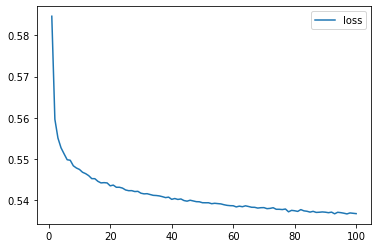

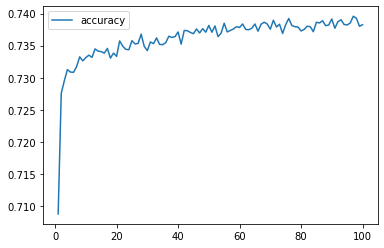

In [73]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")
# Plot the accuracy
history_df.plot(y="accuracy")

In [95]:
## Let's combine optimization strategies, with less epochs

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_layer1 = 40
hidden_layer2 = 20
hidden_layer3 = 5


nn_optimization_final = tf.keras.models.Sequential()

# First hidden layer
nn_optimization_final.add(
    tf.keras.layers.Dense(units=hidden_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn_optimization_final.add(tf.keras.layers.Dense(units=hidden_layer2, activation="tanh"))

# Third hidden layer
nn_optimization_final.add(tf.keras.layers.Dense(units=hidden_layer3, activation="tanh"))

# Output layer
nn_optimization_final.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_optimization_final.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_62 (Dense)             (None, 40)                1760      
_________________________________________________________________
dense_63 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_64 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_65 (Dense)             (None, 1)                 6         
Total params: 2,691
Trainable params: 2,691
Non-trainable params: 0
_________________________________________________________________


In [96]:
# Compile the model
nn_optimization_final.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Train the model
fit_model = nn_optimization_final.fit(X_train_scaled, y_train, epochs=70)

Epoch 1/70
804/804 [==============================] - 1s 1ms/step - loss: 0.5736 - accuracy: 0.7184
Epoch 2/70
804/804 [==============================] - 1s 1ms/step - loss: 0.5559 - accuracy: 0.7306
Epoch 3/70
804/804 [==============================] - 1s 1ms/step - loss: 0.5527 - accuracy: 0.7304
Epoch 4/70
804/804 [==============================] - 1s 1ms/step - loss: 0.5508 - accuracy: 0.7300
Epoch 5/70
804/804 [==============================] - 1s 1ms/step - loss: 0.5490 - accuracy: 0.7325
Epoch 6/70
804/804 [==============================] - 1s 1ms/step - loss: 0.5484 - accuracy: 0.7318
Epoch 7/70
804/804 [==============================] - 1s 1ms/step - loss: 0.5475 - accuracy: 0.7316
Epoch 8/70
804/804 [==============================] - 1s 1ms/step - loss: 0.5468 - accuracy: 0.7325
Epoch 9/70
804/804 [==============================] - 1s 1ms/step - loss: 0.5456 - accuracy: 0.7330
Epoch 10/70
804/804 [==============================] - 1s 1ms/step - loss: 0.5448 - accuracy: 0.7332

In [97]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_optimization_final.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5581 - accuracy: 0.7310
Loss: 0.5580528974533081, Accuracy: 0.7309620976448059


In [98]:
# Import dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define filepaths
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/optimization/weights.{epoch:02d}_optimization.hdf5"

# Create callback
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period = 5)

In [99]:
# Compile the model
nn_optimization_final.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"], )
# Train the model
fit_model = nn_optimization_final.fit(X_train_scaled, y_train, epochs=200, callbacks=[cp_callback])
# Evaluate the model using the test data
model_loss, model_accuracy = nn_optimization_final.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/200
804/804 [==============================] - 2s 1ms/step - loss: 0.5343 - accuracy: 0.7394
Epoch 2/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5339 - accuracy: 0.7397
Epoch 3/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5338 - accuracy: 0.7406
Epoch 4/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5338 - accuracy: 0.7408
Epoch 5/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5337 - accuracy: 0.7405

Epoch 00005: saving model to checkpoints/optimization\weights.05_optimization.hdf5
Epoch 6/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5335 - accuracy: 0.7383
Epoch 7/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5338 - accuracy: 0.7405: 0s - l
Epoch 8/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5336 - accuracy: 0.7409
Epoch 9/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5333 - accuracy: 0.7411

804/804 [==============================] - 1s 1ms/step - loss: 0.5314 - accuracy: 0.7414

Epoch 00070: saving model to checkpoints/optimization\weights.70_optimization.hdf5
Epoch 71/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5316 - accuracy: 0.7413
Epoch 72/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5313 - accuracy: 0.7413
Epoch 73/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5315 - accuracy: 0.7406
Epoch 74/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5314 - accuracy: 0.7408
Epoch 75/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5315 - accuracy: 0.7410

Epoch 00075: saving model to checkpoints/optimization\weights.75_optimization.hdf5
Epoch 76/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5313 - accuracy: 0.7406
Epoch 77/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5313 - accuracy: 0.7408
Epoch 78/200
804/804 [=======

804/804 [==============================] - 1s 1ms/step - loss: 0.5306 - accuracy: 0.7410
Epoch 139/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5306 - accuracy: 0.7415
Epoch 140/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5305 - accuracy: 0.7413

Epoch 00140: saving model to checkpoints/optimization\weights.140_optimization.hdf5
Epoch 141/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5305 - accuracy: 0.7409
Epoch 142/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5304 - accuracy: 0.7412
Epoch 143/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5304 - accuracy: 0.7415
Epoch 144/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5304 - accuracy: 0.7409
Epoch 145/200
804/804 [==============================] - 1s 1ms/step - loss: 0.5303 - accuracy: 0.7420

Epoch 00145: saving model to checkpoints/optimization\weights.145_optimization.hdf5
Epoch 146/200
804/80

In [100]:
# Export our model to HDF5 file
nn_optimization_final.save("AlphabetSoupCharity_Optimization.h5")